## Review python
MSSV: 20120497\
Họ tên: Nguyễn Quang Huy


In [ ]:
#Import các thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### 1. Đọc file dữ liệu vào pandas data frame

In [ ]:
#Đọc file Data_Train_p1 vào dataframe
df_p1 = pd.read_excel("Data_Train_p1.xlsx", header=0, index_col=None)
df_p1

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
#Đọc file Data_Train_p2 vào dataframe
df_p2 = pd.read_excel("Data_Train_p2.xlsx", header=0, index_col=None)
df_p2.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,15/05/2019,Delhi,Cochin,DEL → HYD → COK,06:50,16:10,9h 20m,1 stop,No info,6442
1,Jet Airways,18/05/2019,Kolkata,Banglore,CCU → BOM → BLR,08:25,16:20,7h 55m,1 stop,In-flight meal not included,10844
2,Jet Airways,18/05/2019,Mumbai,Hyderabad,BOM → HYD,10:20,11:50,1h 30m,non-stop,No info,5678
3,IndiGo,12/04/2019,Banglore,Delhi,BLR → DEL,23:30,02:20 13 Apr,2h 50m,non-stop,No info,6906
4,SpiceJet,21/05/2019,Chennai,Kolkata,MAA → CCU,09:45,12:00,2h 15m,non-stop,No check-in baggage included,3543


In [ ]:
#2. Merge hai data frame
df=pd.concat([df_p1,df_p2])
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### 2. Đọc thông tin về dữ liệu

In [ ]:
#Xem thông tin của data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10684 entries, 0 to 1868
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10684 non-null  object
 1   Date_of_Journey  10684 non-null  object
 2   Source           10684 non-null  object
 3   Destination      10684 non-null  object
 4   Route            10683 non-null  object
 5   Dep_Time         10684 non-null  object
 6   Arrival_Time     10684 non-null  object
 7   Duration         10684 non-null  object
 8   Total_Stops      10683 non-null  object
 9   Additional_Info  10684 non-null  object
 10  Price            10684 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.6+ KB


3\. Kết quả cho biết dữ liệu có 10684 dòng, 11 cột\
4\. Hai thuộc tính Route và Total_Stops có missing value do chỉ có hai thuộc tính này có 10683 dòng có giá trị non-null trên tổng 10684 dòng dữ liệu nghĩa là cả hai thuộc tính đều tồn tại một giá trị null.\
6\. Các thuộc tính Airline, Date_of_Journey, Source, Destination, Route, Dep_Time, Arrival_Time, Duration, Total_Stops và Additional_Info có kiểu dữ liệu trong dataframe là object (chuỗi) hoặc  còn Price là int64 (số nguyên).

In [ ]:
#Tìm số lượng dữ liệu trùng
count_duplicates=df.duplicated().sum()
print("5. Số dòng trùng lặp dữ liệu là",count_duplicates)

5. Số dòng trùng lặp dữ liệu là 221


=> Có duplicate dữ liệu

### 3. Vẽ biểu đồ phân bố dữ liệu

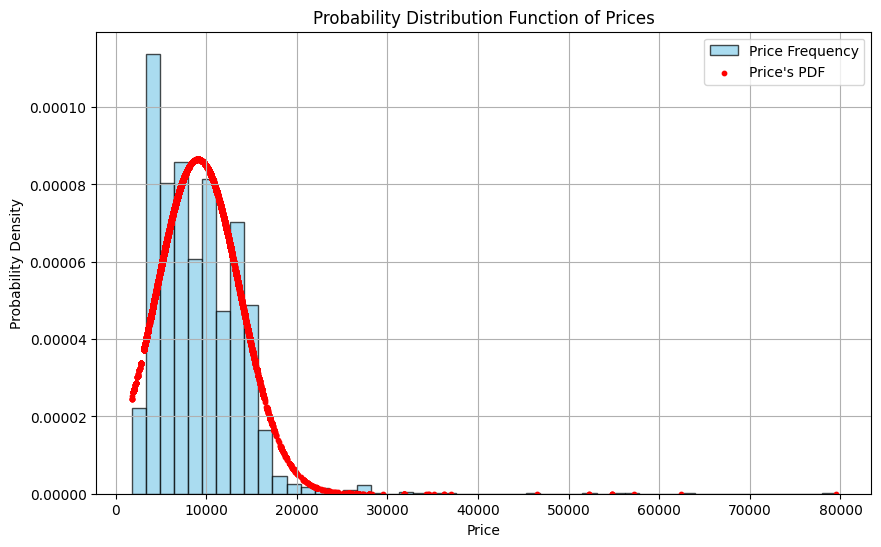

In [ ]:
from scipy.stats import norm

m=df['Price'].mean() #giá trị trung bình
s=df['Price'].std() #standard deviation

plt.figure(figsize=(10,6)) #Gán kích thước hình vẽ

#Vẽ biểu đồ histogram và hàm mật độ của giá tiền
plt.hist(df['Price'],bins=50,density=True,color='skyblue',edgecolor='black',alpha=0.7,label='Price Frequency')
plt.scatter(df['Price'],norm.pdf(df['Price'],m,s),color='red',s=10,label='Price\'s PDF')

#Tủy chỉnh biểu đồ
plt.xlabel('Price')
plt.ylabel('Probability Density')
plt.title('Probability Distribution Function of Prices')
plt.legend()
plt.grid()

plt.show()

### 4. Quan sát sự tương quan giữa các biến dữ liệu

#### 4.1. Quan sát tương quan giữa Duration và Price



In [ ]:
#Chuyển dữ liệu về giờ Duration thành số phút
import re
def convert_time(time):  #hàm chuyển chuỗi Duration thành số phút
  numbers=[int(s) for s in re.findall(r'\d+', str(time))] #tách số giờ với số phút từ chuỗi
  if len(numbers)==0: #không đủ giờ và phút
    return 0
  if len(numbers)==1: #chỉ có giờ
    return 60*numbers[0]
  return 60*numbers[0]+numbers[1]

df['Duration']=df['Duration'].apply(convert_time) #áp dụng function trên
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302


Correlation between Duration and Price is 0.5065690441011138


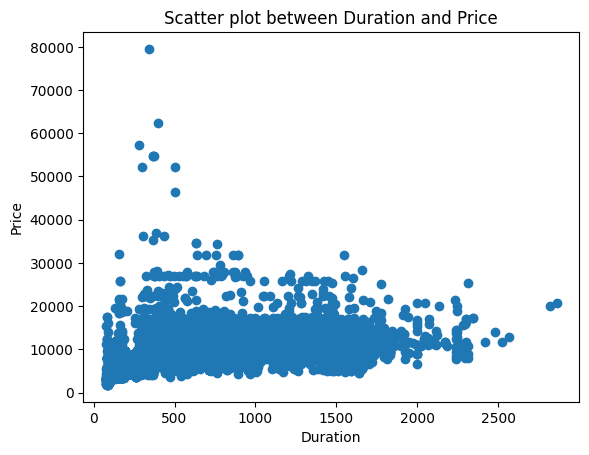

In [ ]:
#Xem giá trị tương quan giữa Duration và Price
correlation=df['Duration'].corr(df['Price'])
print("Correlation between Duration and Price is",correlation)
#Vẽ đồ thị scatter để xem sự tương quan
plt.scatter(df['Duration'],df['Price'])
plt.title('Scatter plot between Duration and Price')
plt.xlabel('Duration')
plt.ylabel('Price')
plt.show()

Tương quan giữa thời gian bay với giá tiền có tương quan trung bình

#### 4.2. Quan sát tương quan giữa Total_Stops và Price

In [ ]:
#Xử lý dữ liệu cột Total_Stops
import re
def convert_total_stops(total_stops):  #hàm chuyển chuỗi Total_stops thành số total_stops
  numbers=[int(s) for s in re.findall(r'\d+', str(total_stops))] #tách số
  if len(numbers)==0: #non-stop
    return 0
  return numbers[0]

df['Total_Stops']=df['Total_Stops'].apply(convert_total_stops) #áp dụng function trên
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,0,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1,No info,13302


Correlation between Total_Stops and Price is 0.6038812995892844


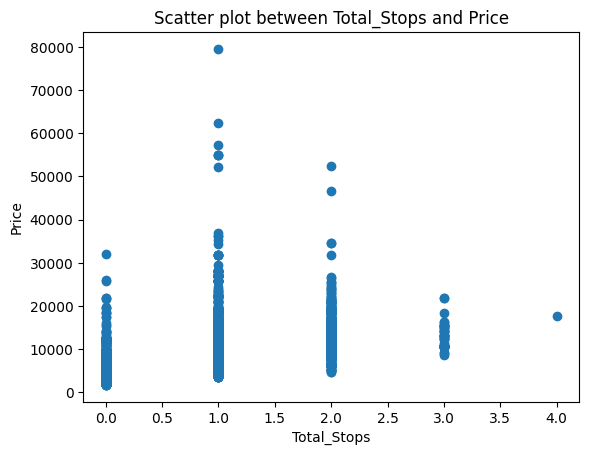

In [ ]:
#Xem giá trị tương quan giữa Total_Stops và Price
correlation=df['Total_Stops'].corr(df['Price'])
print("Correlation between Total_Stops and Price is",correlation)
#Vẽ đồ thị scatter để xem sự tương quan
plt.scatter(df['Total_Stops'],df['Price'])
plt.title('Scatter plot between Total_Stops and Price')
plt.xlabel('Total_Stops')
plt.ylabel('Price')
plt.show()

Tương quan giữa số lần quá cảnh với giá tiền có tương quan trung bình

#### 4.2. Quan sát tương quan giữa Total_Stops và Duration

Correlation between Total_Stops and Duration is 0.7378537708114971


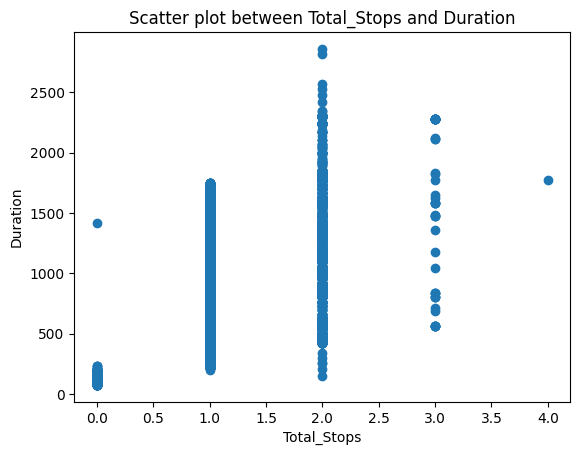

In [ ]:
#Xem giá trị tương quan giữa Total_Stops và Duration
correlation=df['Total_Stops'].corr(df['Duration'])
print("Correlation between Total_Stops and Duration is",correlation)
#Vẽ đồ thị scatter để xem sự tương quan
plt.scatter(df['Total_Stops'],df['Duration'])
plt.title('Scatter plot between Total_Stops and Duration')
plt.xlabel('Total_Stops')
plt.ylabel('Duration')
plt.show()

Tương quan giữa số lần quá cảnh với giá tiền có tương quan tương đối khi ta có thể thấy là càng nhiều số lần quá cảnh thì thời gian bay có xu hướng tăng lên